In [10]:
import pandas as pd

read_path = '../article/weekly_article/'
write_path = '../article/headline_keyword/'
#column_name = ['date','cat','co','headline','text','url']
article = []

for week in range(783):
    article.append(pd.read_csv(f'{read_path}article_week{week}.csv', encoding = 'cp949'))

In [11]:
from krwordrank.hangle import normalize
from krwordrank.word import KRWordRank

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

texts = article[0]['headline']
texts = [normalize(text, english=True, number=True) for text in texts]

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )
keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

result = pd.Series(keywords)

scan vocabs ... 
num vocabs = 576
done = 10


In [ ]:
for i in range(1,783):
    texts = article[i]['headline']
    texts = [normalize(text, english=True, number=True) for text in texts]
    
    wordrank_extractor = KRWordRank(
        min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
        max_length = 10, # 단어의 최대 길이
        verbose = True
        )
    keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)
    
    df = pd.Series(keywords)
    
    result = pd.concat([result,df],axis=1, ignore_index=True)
display(result)

In [ ]:
result.to_csv(f'{write_path}weekly_headline_keyword', encoding = 'cp949')

In [12]:
stopwords = {'2006','31','키워드'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

In [13]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 576
done = 10


In [14]:
from wordcloud import WordCloud

# Set your font path
font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

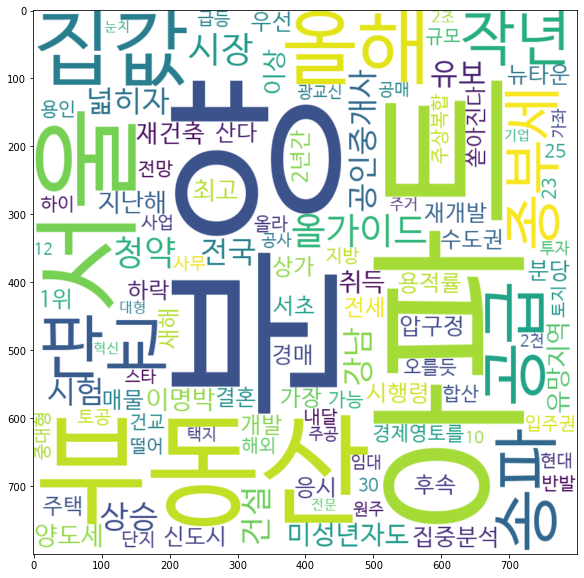

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

fig.savefig(f'{write_path}0week_keyword_cloud.png')